<h1>Dimensionality Reduction</h1>

PCA and UMAP techniques applied to a Spotify song dataset.

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from ipynb.fs.full.funPyModeling import status, cat_vars, todf

<h3>Data Loading</h3>

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv")

<h3>Dataset Status</h3>

In [4]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,track_id,0,0.000000,0,0.000000,28356,object
1,track_name,5,0.000152,0,0.000000,23449,object
2,track_artist,5,0.000152,0,0.000000,10692,object
3,track_popularity,0,0.000000,2703,0.082326,101,int64
4,track_album_id,0,0.000000,0,0.000000,22545,object
5,track_album_name,5,0.000152,0,0.000000,19743,object
6,track_album_release_date,0,0.000000,0,0.000000,4530,object
7,playlist_name,0,0.000000,0,0.000000,449,object
8,playlist_id,0,0.000000,0,0.000000,471,object
9,playlist_genre,0,0.000000,0,0.000000,6,object


In this dataset there are NaNs in 'track_name', 'track_artist' and 'track_album_name'

<h3>Data Preparation</h3>

In [5]:
data = data.drop_duplicates(subset="track_id")

In [8]:
x_data = data.drop(cat_vars(data), axis=1)

In [9]:
x_data = x_data.drop(['key','speechiness', 'mode', 'tempo', 'duration_ms'], axis=1)

Data scaling

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

<h3>Models Creation (PCA)</h3>

In [15]:
model_pca = PCA()

Fitting the model

In [16]:
model_pca.fit_transform(x_scaled)

array([[-1.48109617e+00, -1.03422608e+00, -6.10225386e-01, ...,
         8.13344172e-02, -5.50581283e-01,  3.12373735e-01],
       [-1.17046922e+00, -9.19940532e-01, -7.78286968e-01, ...,
        -6.03744122e-02,  1.92640413e-01,  2.11772455e-02],
       [-1.52334040e+00, -9.33103961e-01, -8.28582564e-01, ...,
         4.68491577e-01, -2.46316252e-02,  3.11581472e-01],
       ...,
       [-9.61889450e-01,  7.98303321e-01,  1.52845503e-02, ...,
         2.09174263e-01, -1.83254989e-01, -3.48705684e-04],
       [-1.78665757e+00,  1.24623533e+00,  2.73340859e-01, ...,
        -5.47860998e-01, -6.60269957e-01, -3.06189420e-02],
       [-1.77801938e+00,  2.77267982e+00, -8.01345758e-02, ...,
        -1.19071123e+00, -7.10979035e-01,  9.06816088e-02]])

In [17]:
x_pca = model_pca.fit_transform(x_scaled)

Explained variance

In [19]:
var_explicada=  model_pca.explained_variance_ratio_

df_var_exp = todf(var_explicada)
df_var_exp

,0
0,0.267183
1,0.178446
2,0.140041
3,0.121999
4,0.107533
5,0.082235
6,0.074884
7,0.027681


<h3>Graphics</h3>

In [20]:
x_data_copy = x_data.copy()
x_data_copy = x_data_copy.reset_index(drop=True)
x_data_copy[['comp1', 'comp2']] = todf(x_pca).iloc[:,[0,1]]

<AxesSubplot:xlabel='comp1', ylabel='comp2'>

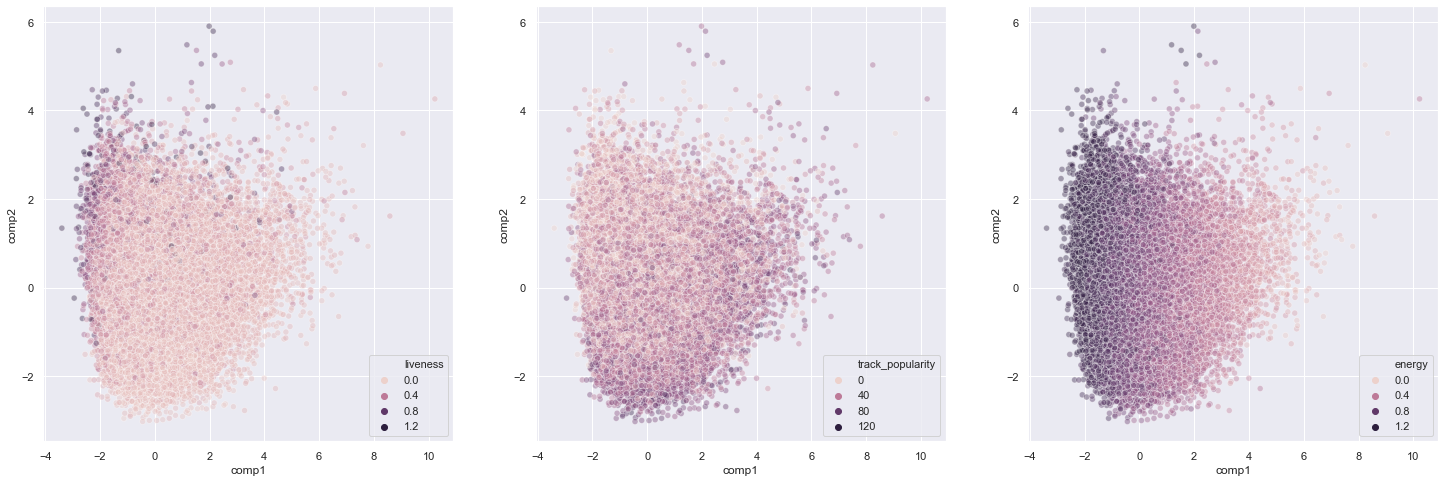

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
sns.scatterplot(x="comp1", y="comp2", hue="liveness", data=x_data_copy, alpha=0.4, ax=ax1)
sns.scatterplot(x="comp1", y="comp2", hue="track_popularity", data=x_data_copy, alpha=0.4, ax=ax2)
sns.scatterplot(x="comp1", y="comp2", hue="energy", data=x_data_copy, alpha=0.4, ax=ax3)

Analyzing this graphics, the following conclusions are reached:
<li>Where the liveness is higher, the energy is higher too, but the popularity is very low</li>
<li>Where the liveness is lower, the energy is at a medium value, and the popularity is high</li>
<li>Where the energy is at a medium value, the liveness is very low, and the popularity varies a lot</li>

<h3>Models Creation (UMAP)</h3>

Data scaling

In [24]:
x_scaled = StandardScaler().fit_transform(x_data)

In [25]:
model_umap = umap.UMAP()

Fitting the model

In [26]:
model_umap.fit(x_scaled)

UMAP()

In [28]:
embedding = model_umap.fit_transform(x_scaled)

<h3>Graphics</h3>

In [29]:
x_data_copy2 = x_data.copy()
x_data_copy2 = x_data_copy2.reset_index(drop=True)
x_data_copy2[['dim1', 'dim2']] = embedding

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

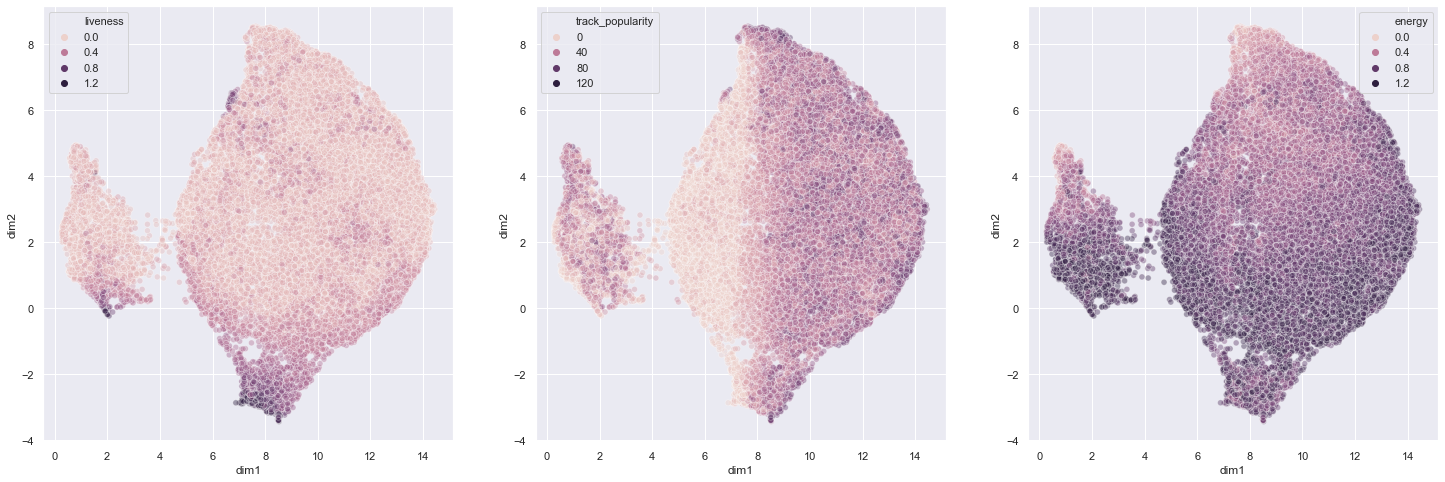

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,8))
sns.scatterplot(x="dim1", y="dim2", hue="liveness", data=x_data_copy2, alpha=0.4, ax=ax1)
sns.scatterplot(x="dim1", y="dim2", hue="track_popularity", data=x_data_copy2, alpha=0.4, ax=ax2)
sns.scatterplot(x="dim1", y="dim2", hue="energy", data=x_data_copy2, alpha=0.4, ax=ax3)

Analyzing this graphics, the following conclusions are reached:
<li>Where the liveness is higher, the popularity and the energy are higher too</li>
<li>Where the the popularity is higher, the energy is higher and the liveness is very low</li>


<h3>Insights</h3>

From this analysis, i see that with the same data and scaling, the transformation is different. Both models return some similar insights but the shape is different. Between PCA and UMAP, i prefer the UMAP insights because it separates better.